In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [24]:
dict_names=['HadCM3_av','HadCM3_s1','HadCM3_s2','HadCM3_s3','CESM_t','CESM_dt',
       'Pages_t','Pages_dt','HadCM3_LGM_an','HadCM3_LGM_abs']
data_prefix=['HadCM3_','HadCM3_','HadCM3_','HadCM3_','CESM_','CESM_','Pages_','Pages_','HadCM3_LGM_','HadCM3_LGM_']
data_suffix=['_20_resp_av','_20_resp_s1','_20_resp_s2','_20_resp_s3','_20_resp_t','_20_resp_dt',
       '_20_resp_t','_20_resp_dt','_20_resp_an','_20_abs']

num_data=len(dict_names)
data_dict_ZMT={}
data_dict_GMT={}
data_dict_P={}
data_dict_F={}
data_dict_dF={}
for k in range(8):
    data_dict_ZMT[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions/'+data_prefix[k]+'ZMT'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_GMT[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions/'+data_prefix[k]+'GMT'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_P[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions/'+data_prefix[k]+'P'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_F[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions/'+data_prefix[k]+'F'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_dF[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions/'+data_prefix[k]+'dF'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
for k in [8,9]:
    data_dict_ZMT[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions_fixeda/'+data_prefix[k]+'ZMT'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_GMT[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions_fixeda/'+data_prefix[k]+'GMT'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_P[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions_fixeda/'+data_prefix[k]+'P'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_F[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions_fixeda/'+data_prefix[k]+'F'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)
    data_dict_dF[dict_names[k]]=np.genfromtxt('../Data/Optimiztaions_fixeda/'+data_prefix[k]+'dF'+data_suffix[k]+'.txt'
                                               , delimiter=',',unpack=True)

In [25]:
Lat_10,ZMT_ERA_an=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')
Lat_10,ZMT_ERA_abs=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMT.txt')
Lat_10,ZMT_HadCM3_LGM_abs=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,ZMT_HadCM3_LGM_an=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')

In [26]:
Time_HadCM3,Target_HadCM3_av=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')
Time_HadCM3,Target_HadCM3_s1,Target_HadCM3_s2,Target_HadCM3_s3=np.loadtxt(
                                        'Experiments/HadCM3/HadCM3_850_1850_anomaly_single.txt',delimiter=',')
Time_CESM,Target_CESM_t=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_CESM,Target_CESM_dt=np.loadtxt('Experiments/CESM/CESM_850_1850_response_detrend.txt',delimiter=',')
Time_Pages,Target_Pages_t=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')
Time_Pages,Target_Pages_dt=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850_detrend.txt',delimiter=',')
Time_HadCM3_LGM,Target_HadCM3_LGM=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_850_1850_anomaly.txt',delimiter=',')

In [5]:
data_dict_GMT_target={}
data_dict_GMT_time={}
Targets_GMT=[Target_HadCM3_av,Target_HadCM3_s1,Target_HadCM3_s2,Target_HadCM3_s3,
             Target_CESM_t,Target_CESM_dt,Target_Pages_t,Target_Pages_dt,Target_HadCM3_LGM,Target_HadCM3_LGM]
Times_GMT=[Time_HadCM3,Time_HadCM3,Time_HadCM3,Time_HadCM3,
             Time_CESM,Time_CESM,Time_Pages,Time_Pages,Time_HadCM3_LGM,Time_HadCM3_LGM]
for k in range(num_data):
    data_dict_GMT_target[dict_names[k]]=Targets_GMT[k]
    data_dict_GMT_time[dict_names[k]]=Times_GMT[k]

In [48]:
data_dict_GMT['HadCM3_LGM_an'][:,1]

array([ 1.03820644,  1.01794839,  0.9987222 , ..., -0.19129947,
       -0.19072699, -0.19018233])

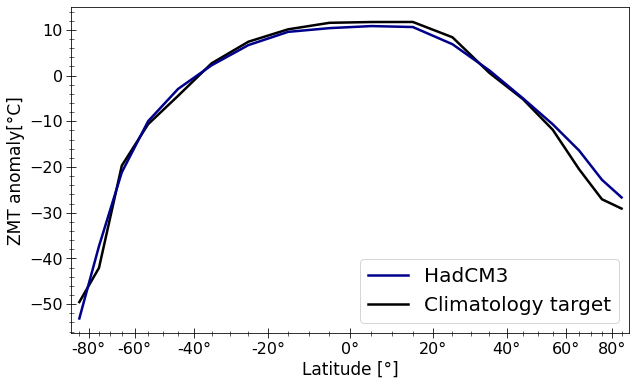

In [52]:
plt.figure(figsize=(10,6))
plt.plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_an'][:,1],color='darkblue',label='HadCM3',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)
plt.xscale('latarea')
plt.xlabel('Latitude [°]',fontsize=17)
plt.ylabel('ZMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [27]:
from matplotlib import colors
cols=np.array(['darkblue','blue','dodgerblue','lightblue',
               'darkgreen','limegreen',
               'darkorange','moccasin',
               'darkviolet','violet'])
cols_rgb=[colors.hex2color(colors.cnames[cols[i]]) for i in range(10)]

parameter_labels=['c_ao [m]','a [$Wm^{-2}$]','b [$Wm^{-2}T^{-1}$]','factor_oc','factor_kwv','factor_kair']


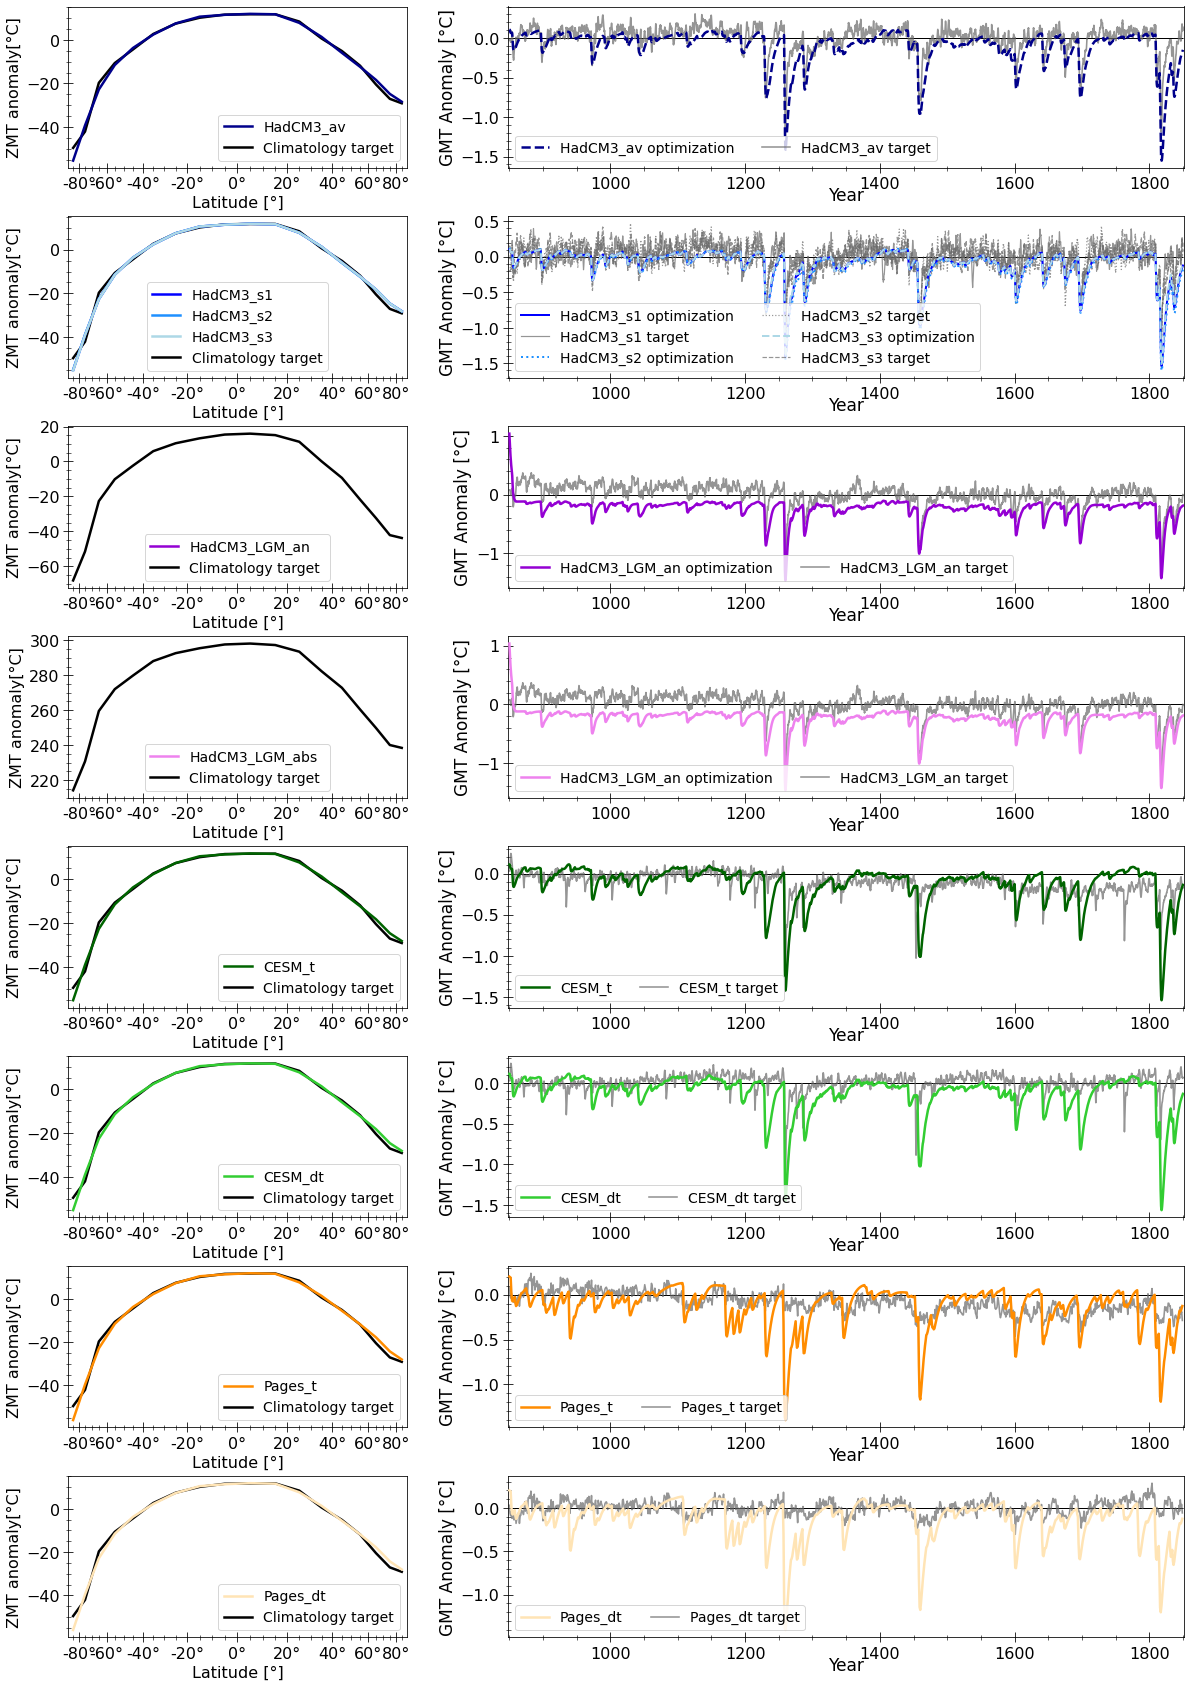

In [53]:
fig=plt.figure(figsize=(20,30))
gs = gridspec.GridSpec(8, 2, width_ratios=[1, 2]) 
ax=np.array([[plt.subplot(gs[i,0]),plt.subplot(gs[i,1])] for i in range(8)])

ax[0,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_av'][:,-1],color=cols_rgb[0],label='HadCM3_av',zorder=5)
ax[0,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s1'][:,-1],color=cols_rgb[1],label='HadCM3_s1',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s2'][:,-1],color=cols_rgb[2],label='HadCM3_s2',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s3'][:,-1],color=cols_rgb[3],label='HadCM3_s3',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[2,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_an'][:,-1],color=cols_rgb[-2],label='HadCM3_LGM_an',zorder=5)
ax[2,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_an,'k',label='Climatology target ',zorder=-1)

ax[3,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_abs'][:,-1],color=cols_rgb[-1],label='HadCM3_LGM_abs',zorder=5)
ax[3,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_abs,'k',label='Climatology target ',zorder=-1)

for i in [4,5,6,7]:
    ax[i,0].plot(np.deg2rad(Lat_10),data_dict_ZMT[dict_names[i]][:,-1],color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""ax[5,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['CESM_dt'][:,-1],color=cols_rgb[5],label='CESM_dt',zorder=5)
ax[5,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[6,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_t'][:,-1],color=cols_rgb[6],label='Pages_t',zorder=5)
ax[6,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[7,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_dt'][:,-1],color=cols_rgb[7],label='Pages_dt',zorder=5)
ax[7,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""
ax[0,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_av'][:,-1],linewidth=2.5,alpha=1,linestyle='--',
             color=cols_rgb[0],label='HadCM3_av optimization',zorder=5)
ax[0,1].plot(Time_HadCM3,Target_HadCM3_av,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_av target')

ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s1'][:,-1],linewidth=2.0,alpha=1,color=cols_rgb[1]
             ,label='HadCM3_s1 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s1,color='dimgray',linewidth=1.2,alpha=.7
             , label='HadCM3_s1 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s2'][:,-1],linewidth=2.0,alpha=1,linestyle=':',color=cols_rgb[2]
             ,label='HadCM3_s2 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s2,color='dimgray',linewidth=1.2,alpha=.7,linestyle=':'
             ,label='HadCM3_s2 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s3'][:,-1],linewidth=2.0,alpha=1,linestyle='--',color=cols_rgb[3]
             ,label='HadCM3_s3 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s3,color='dimgray',linewidth=1.2,alpha=.7,linestyle='--'
             ,label='HadCM3_s3 target')

ax[2,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_an'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[-2],label='HadCM3_LGM_an optimization',zorder=5)
ax[2,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_an target')

ax[3,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_abs'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[-1],label='HadCM3_LGM_an optimization',zorder=5)
ax[3,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_an target')

for i in [4,5,6,7]:
    ax[i,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT[dict_names[i]][:,-1],linewidth=2.5,alpha=1,color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT_target[dict_names[i]],color='dimgray',linewidth=1.6,alpha=.7, label=dict_names[i]+' target')

"""ax[5,1].plot(Time_CESM,data_dict_GMT['CESM_dt'][:,-1],linewidth=2.5,alpha=1,color='darkgreen',label='CESM_dt optimization',zorder=5)
ax[5,1].plot(Time_CESM,Target_CESM_dt,color='dimgray',linewidth=1.6,alpha=.7, label='CESM_dt target')

ax[6,1].plot(Time_Pages,data_dict_GMT['Pages_t'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_t optimization',zorder=5)
ax[6,1].plot(Time_Pages,Target_Pages_t,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_t target')

ax[7,1].plot(Time_Pages,data_dict_GMT['Pages_dt'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_dt optimization',zorder=5)
ax[7,1].plot(Time_Pages,Target_Pages_dt,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_dt target')
"""
for i in range(8):
    ax[i,0].set_xscale('latarea')
    ax[i,0].set_xlabel('Latitude [°]',fontsize=16)
    ax[i,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
    ax[i,0].legend(fontsize=14)

    ax[i,1].set_xlim(848,1852)
    ax[i,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
    ax[i,1].set_xlabel('Year',fontsize=17,labelpad=-5)
    ax[i,1].legend(fontsize=14,loc='lower left',ncol=2)
    ax[i,1].hlines(0,850,1850,linewidth=1)

plt.subplots_adjust(hspace=0.3)

[0.01428571 0.85       0.68421053 0.77253219 0.77253219 0.77253219]
[1.42857143 1.2        1.31578947 1.11587983 1.11587983 1.11587983]


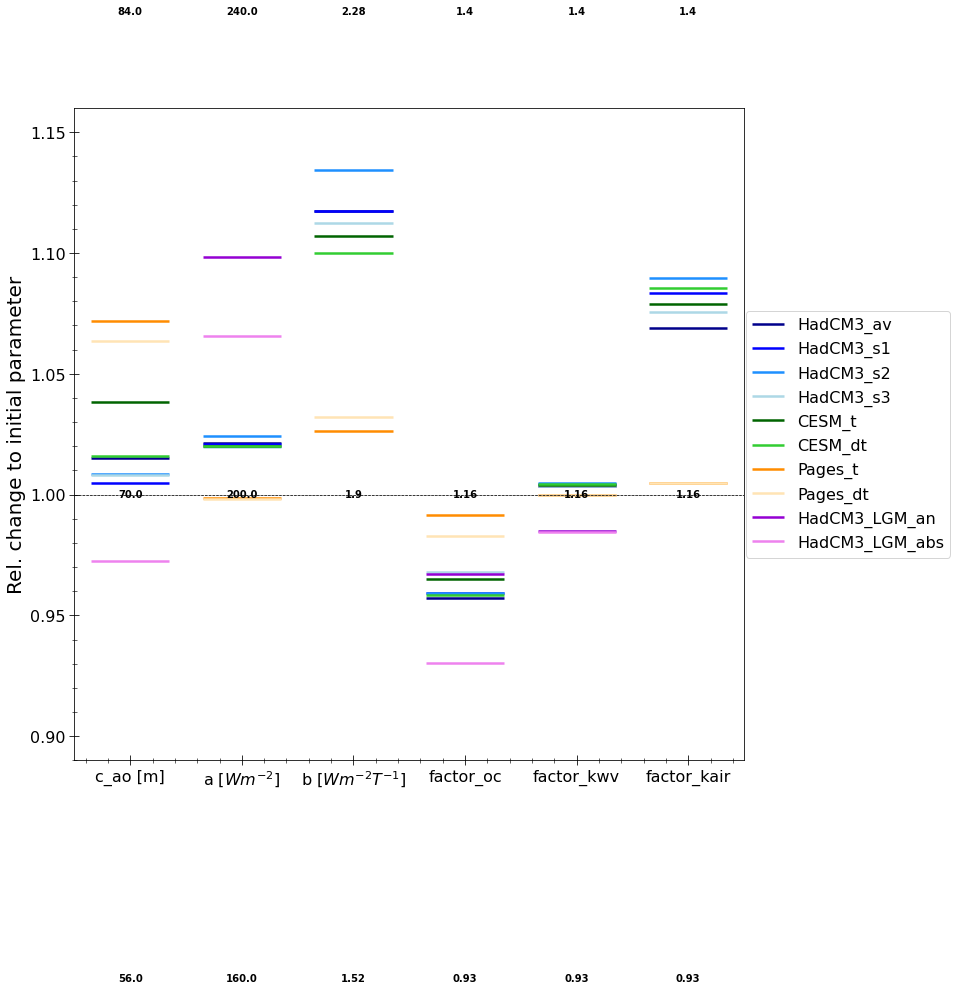

In [60]:
plt.figure(figsize=(12,12))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
all_paras=np.array([[list(data_dict_P.values())[i][k,0] for i in range(10)] for k in range(6)])
all_paras[0]=all_paras[0]/4.2e6

for k in range(6):
    for i in range(10):
        if k==0:
            plt.eventplot([all_paras[k][i]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb[i],label=dict_names[i])
        else:
            
            plt.eventplot([all_paras[k][i]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb[i])
plt.hlines(1,-1,6,linewidth=0.7,linestyle='--')
plt.xlim(-0.5,5.5)
plt.ylim(0.89,1.16)
for h in [0.8,1,1.2]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        plt.text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    plt.hlines(h,-1,6,linewidth=0.5,linestyle=':')
plt.xticks(np.arange(6),parameter_labels)
plt.ylabel('Rel. change to initial parameter')
plt.legend(loc='center right',bbox_to_anchor=(1.32,0.5),fontsize=16)
print(Pmin/P0)
print(Pmax/P0)

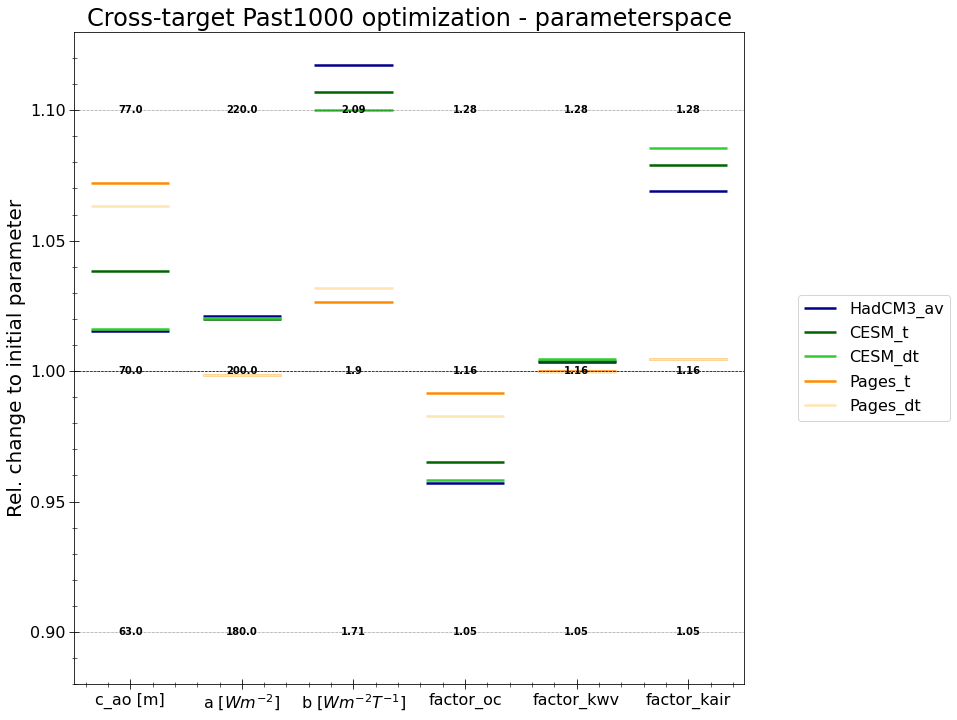

In [21]:
plt.figure(figsize=(12,12))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
all_paras=np.array([[list(data_dict_P.values())[i][k,0] for i in range(10)] for k in range(6)])
all_paras[0]=all_paras[0]/4.2e6

for k in range(6):
    for i in [0,4,5,6,7]:
        if k==0:
            plt.eventplot([all_paras[k][i]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb[i],label=dict_names[i])
        else:
            
            plt.eventplot([all_paras[k][i]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb[i])
plt.hlines(1,-1,6,linewidth=0.7,linestyle='--')
plt.xlim(-0.5,5.5)
plt.ylim(0.88,1.13)
for h in [0.9,1,1.1]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        plt.text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    plt.hlines(h,-1,6,linewidth=0.5,linestyle=':')
plt.xticks(np.arange(6),parameter_labels)
plt.ylabel('Rel. change to initial parameter')
plt.title('Cross-target Past1000 optimization - parameterspace')
plt.legend(loc='center right',bbox_to_anchor=(1.32,0.5),fontsize=16)
plt.savefig('../Latex/Figures/Cross_target_optim.png',dpi=400,transparent=True,bbox_inches='tight')

(0.0, 20.0)

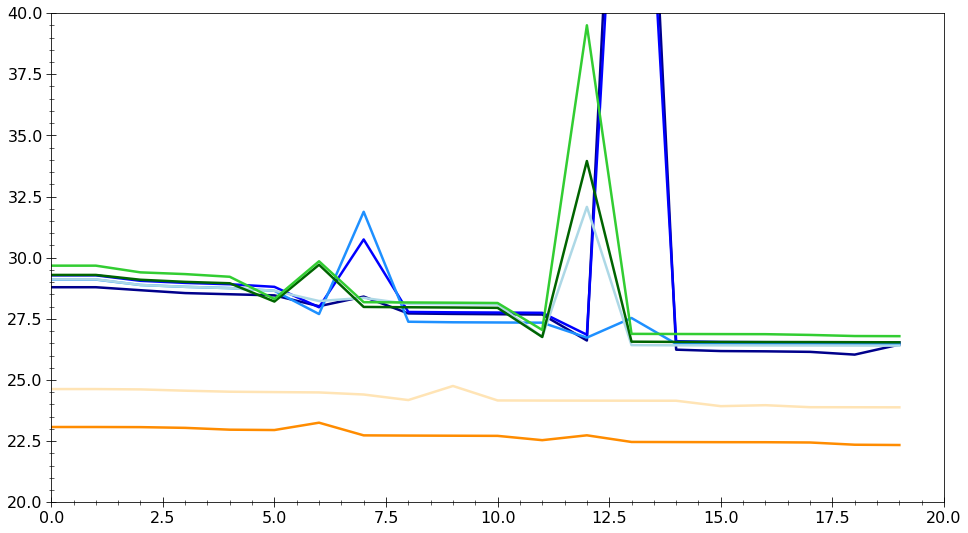

In [45]:
for i in range(10):
    plt.plot(np.arange(20),data_dict_F[dict_names[i]][0],c=cols_rgb[i],label=dict_names)
plt.ylim(20,40)
plt.xlim(0,20)
